### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.

    Note:
    You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

# 6.2.6 Get the City Weather Data #

### Import Dependencies, and Initialize an Empty List and Counters ###

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=29364cbe7cc686003a1aabd7b3d8dbc4


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khormuj
City not found. Skipping...
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | bolobo
Processing Record 15 of Set 1 | abu samrah
Processing Record 16 of Set 1 | comodoro rivadavia
Processing Record 17 of Set 1 | mandalgovi
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 20 of Set 1 

Processing Record 37 of Set 4 | corcoran
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | doctor arroyo
Processing Record 40 of Set 4 | opelousas
Processing Record 41 of Set 4 | hualmay
Processing Record 42 of Set 4 | teahupoo
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | kudat
Processing Record 45 of Set 4 | hinton
Processing Record 46 of Set 4 | chapais
Processing Record 47 of Set 4 | les cayes
Processing Record 48 of Set 4 | okhotsk
Processing Record 49 of Set 4 | teavaro
Processing Record 50 of Set 4 | talakan
Processing Record 1 of Set 5 | oranjemund
Processing Record 2 of Set 5 | celinac
Processing Record 3 of Set 5 | new norfolk
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | kabinda
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | marzuq
Processing Record 8 of Set 5 | nikolskoye
Processing Record 9 of Set 5 | bosaso
Processing Record 10 of Set 5 | pan

Processing Record 28 of Set 8 | hofn
Processing Record 29 of Set 8 | njeru
Processing Record 30 of Set 8 | buraydah
Processing Record 31 of Set 8 | luderitz
Processing Record 32 of Set 8 | ituni
City not found. Skipping...
Processing Record 33 of Set 8 | victor harbor
Processing Record 34 of Set 8 | danshui
Processing Record 35 of Set 8 | haines junction
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | bandar maharani
City not found. Skipping...
Processing Record 38 of Set 8 | neiafu
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | yook
Processing Record 41 of Set 8 | praya
Processing Record 42 of Set 8 | tromso
Processing Record 43 of Set 8 | kainantu
Processing Record 44 of Set 8 | lazurne
Processing Record 45 of Set 8 | west bay
Processing Record 46 of Set 8 | hondo
Processing Record 47 of Set 8 | tarakan
Processing Record 48 of Set 8 | skerries
Processing Record 49 of Set 8 | coquimbo
Processing Record 50 of Set 8 | payakumbuh
Proces

Processing Record 13 of Set 12 | antofagasta
Processing Record 14 of Set 12 | matay
Processing Record 15 of Set 12 | damaturu
Processing Record 16 of Set 12 | ojinaga
Processing Record 17 of Set 12 | santa paula
Processing Record 18 of Set 12 | nagybajom
Processing Record 19 of Set 12 | nanakuli
Processing Record 20 of Set 12 | kupang
Processing Record 21 of Set 12 | port augusta
Processing Record 22 of Set 12 | sabha
Processing Record 23 of Set 12 | stornoway
Processing Record 24 of Set 12 | burica
City not found. Skipping...
Processing Record 25 of Set 12 | wawa
Processing Record 26 of Set 12 | manokwari
Processing Record 27 of Set 12 | noyabrsk
Processing Record 28 of Set 12 | washington
Processing Record 29 of Set 12 | nguiu
City not found. Skipping...
Processing Record 30 of Set 12 | salcedo
Processing Record 31 of Set 12 | medvedevo
Processing Record 32 of Set 12 | canutama
Processing Record 33 of Set 12 | maamba
Processing Record 34 of Set 12 | cabinda
Processing Record 35 of Se

### Handle API Request Errors with try-except Blocks

In [10]:
len(city_data)

578

# 6.2.7 Create a DataFrame of City Weather Data #

Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,64.45,85,88,10.78,ZA,2021-10-31 06:27:51
1,Carnarvon,-24.8667,113.6333,77.07,65,0,21.85,AU,2021-10-31 06:24:19
2,East London,-33.0153,27.9116,70.74,68,0,6.91,ZA,2021-10-31 06:23:14
3,Qaqortoq,60.7167,-46.0333,27.00,72,27,5.17,GL,2021-10-31 06:27:51
4,Albany,42.6001,-73.9662,53.74,95,100,4.23,US,2021-10-31 06:23:36
5,Port Elizabeth,-33.9180,25.5701,67.10,82,0,6.91,ZA,2021-10-31 06:23:52
6,Punta Arenas,-53.1500,-70.9167,37.51,87,0,6.91,CL,2021-10-31 06:24:42
7,Tiksi,71.6872,128.8694,15.10,71,98,15.73,RU,2021-10-31 06:27:52
8,Hilo,19.7297,-155.0900,73.13,86,40,3.44,US,2021-10-31 06:24:39
9,Hobart,-42.8794,147.3294,62.46,51,75,1.01,AU,2021-10-31 06:27:53


In [12]:
# Reordet columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity",
                   "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2021-10-31 06:27:51,-33.0117,17.9442,64.45,85,88,10.78
1,Carnarvon,AU,2021-10-31 06:24:19,-24.8667,113.6333,77.07,65,0,21.85
2,East London,ZA,2021-10-31 06:23:14,-33.0153,27.9116,70.74,68,0,6.91
3,Qaqortoq,GL,2021-10-31 06:27:51,60.7167,-46.0333,27.00,72,27,5.17
4,Albany,US,2021-10-31 06:23:36,42.6001,-73.9662,53.74,95,100,4.23
...,...,...,...,...,...,...,...,...,...
573,Qasigiannguit,GL,2021-10-31 06:27:32,68.8193,-51.1922,32.47,80,100,8.81
574,Chifeng,CN,2021-10-31 06:32:20,42.2683,118.9636,42.85,53,91,6.26
575,Kirensk,RU,2021-10-31 06:32:21,57.7853,108.1119,36.03,88,100,5.44
576,Altea,ES,2021-10-31 06:32:22,38.5989,-0.0514,75.69,87,100,5.01


Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Modify the .gitignore File ###

However, every time we want to add a new file or update current files to the repository, we have to add each file individually, which is time-consuming and cumbersome. Instead, we can add the files we don't want to track to the .gitignore file.

# 6.3.1. Plot Latitude vs. Temperature #

Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

### Get Data for Plotting


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

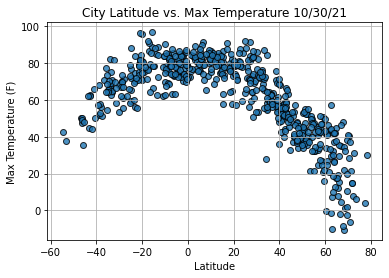

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

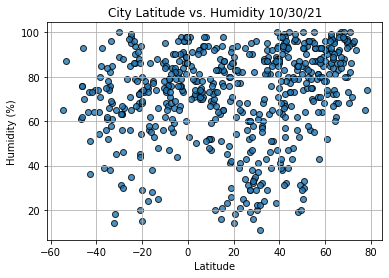

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

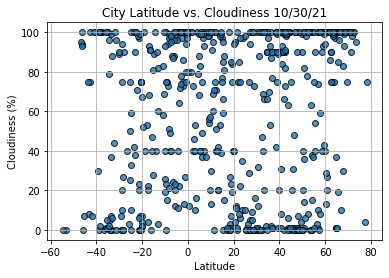

In [17]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

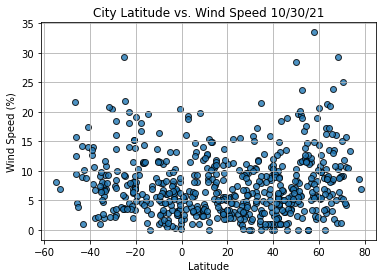

In [18]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables #

Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 

Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable

    Note:
    To determine how strong the relationship is between the fitted line and the data, we find the correlation coefficient, or r-value. A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong negative correlation. A correlation coefficient close to zero is no correlation.

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

### Create a Linear Regression Function

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames ###

    Note:
    To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

In [20]:
index13 = city_data_df.loc[13]
index13

City           Comodoro Rivadavia
Country                        AR
Date          2021-10-31 06:27:55
Lat                      -45.8667
Lng                         -67.5
Max Temp                    35.46
Humidity                       93
Cloudiness                      0
Wind Speed                   4.61
Name: 13, dtype: object

In [21]:
# We can also filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
573     True
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Qaqortoq,GL,2021-10-31 06:27:51,60.7167,-46.0333,27.00,72,27,5.17
4,Albany,US,2021-10-31 06:23:36,42.6001,-73.9662,53.74,95,100,4.23
7,Tiksi,RU,2021-10-31 06:27:52,71.6872,128.8694,15.10,71,98,15.73
8,Hilo,US,2021-10-31 06:24:39,19.7297,-155.0900,73.13,86,40,3.44
10,Hamilton,US,2021-10-31 06:27:07,39.1834,-84.5333,53.24,94,90,1.01
...,...,...,...,...,...,...,...,...,...
573,Qasigiannguit,GL,2021-10-31 06:27:32,68.8193,-51.1922,32.47,80,100,8.81
574,Chifeng,CN,2021-10-31 06:32:20,42.2683,118.9636,42.85,53,91,6.26
575,Kirensk,RU,2021-10-31 06:32:21,57.7853,108.1119,36.03,88,100,5.44
576,Altea,ES,2021-10-31 06:32:22,38.5989,-0.0514,75.69,87,100,5.01


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere ###

Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

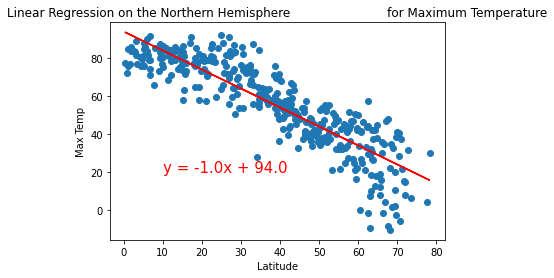

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere ###

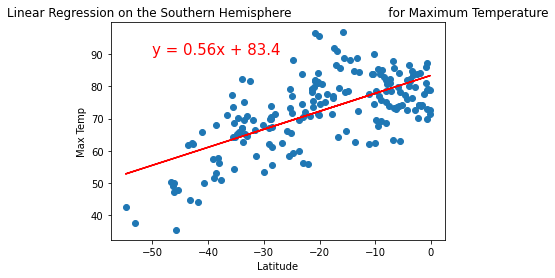

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity #

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere


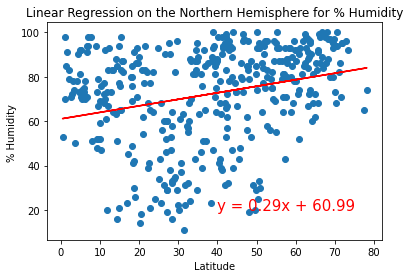

In [26]:
# Linear regression on the Percent Humidity for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity ',(40,20))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

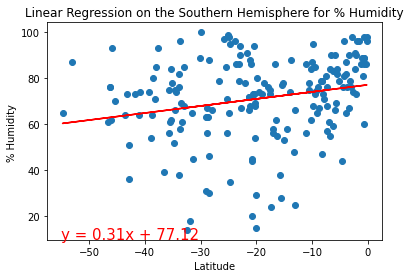

In [27]:
# Linear regression on the Percent Humidity for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity ',(-55,10))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness #

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere ###

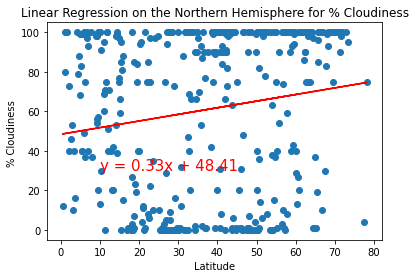

In [28]:
# Linear regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness ',(10,30))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

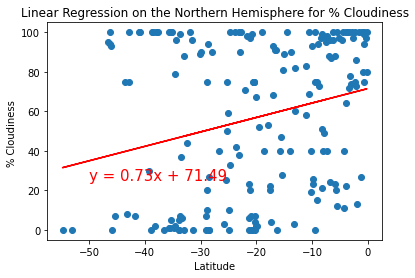

In [29]:
# Linear regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness ',(-50,25))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed #

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere ###

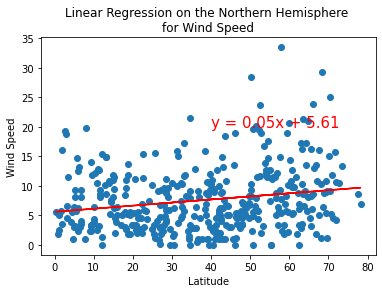

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,20))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

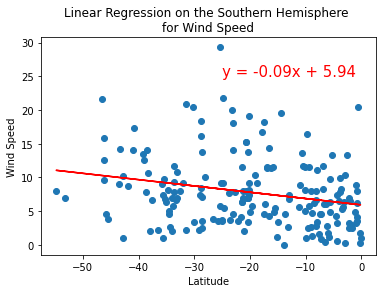

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-25,25))

# 6.5.1 Set Up Google Maps and Places API #

### Install the gmaps Dependency

# 6.5.2 Create Heatmaps for Weather Parameters